In [121]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

In [122]:
# Load the dataset
df = pd.read_csv("heart.csv")

In [123]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [124]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [125]:
df.shape

(1025, 14)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [127]:
#cheking the available columns in the data set
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

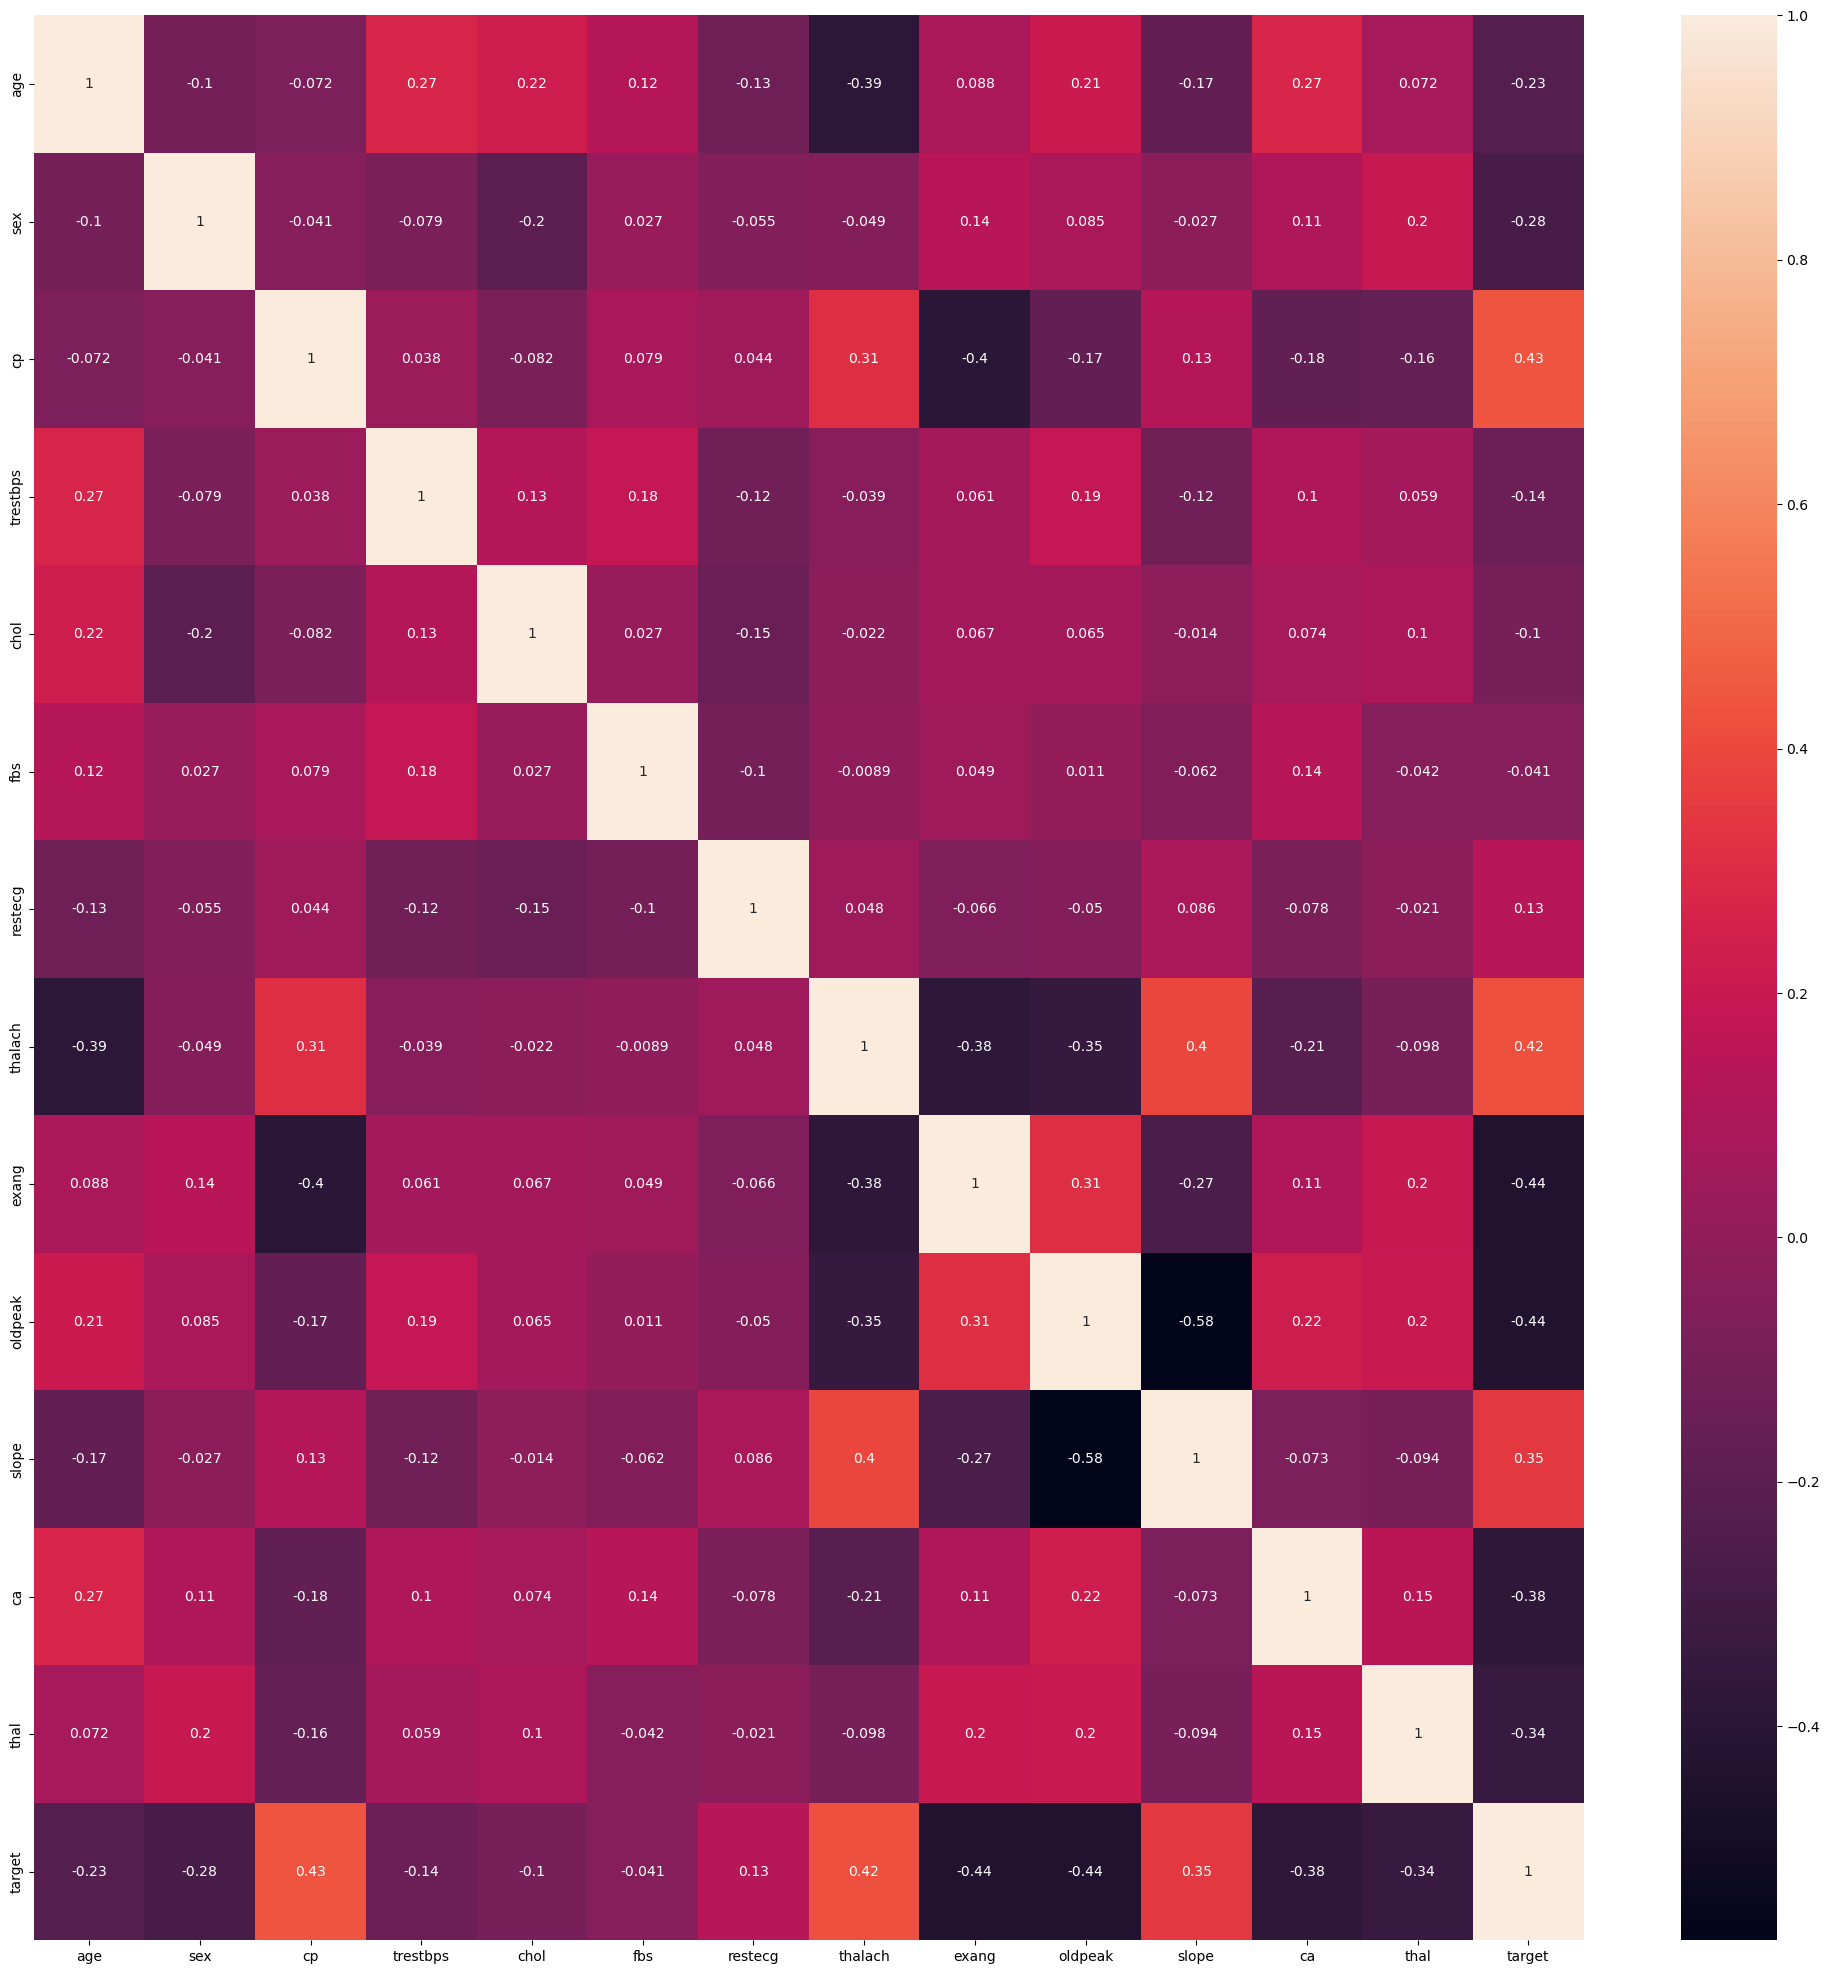

In [128]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr() , annot=True)

In [129]:
# Numeric Variables's statistical summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
Data Preprocessing

In [130]:
#check null values of the trainin gdata set

df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [131]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [132]:
duplicateRows = df[df.duplicated()]
print("Number of duplicate rows:",duplicateRows.shape)

Number of duplicate rows: (723, 14)


In [ ]:
Flag the duplicate rows

In [133]:
df['is_duplicate'] = df.duplicated()

In [ ]:
Data visualization

In [ ]:
Separating Independant and dependant Variable

In [134]:
# Split the data into features and target
X = data.drop("target", axis=1)
y = data["target"]


In [35]:
Splitting training and testing data set

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Standardize the feature values (optional but often helpful)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
# Define the VAE architecture
original_dim = X_train.shape[1]
latent_dim = 2

In [139]:
# Encode the data
encoded_X = encoder.predict(X)

33/33 [==============================] - 0s 1ms/step


In [140]:
# Decode the encoded data to get reconstructed data
decoded_X = autoencoder.predict(X)

33/33 [==============================] - 0s 1ms/step


In [141]:
# Choose a random sample from the dataset for visualization
sample_index = np.random.randint(0, len(X))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:title={'center':'Sex vs Target'}, xlabel='sex', ylabel='count'>

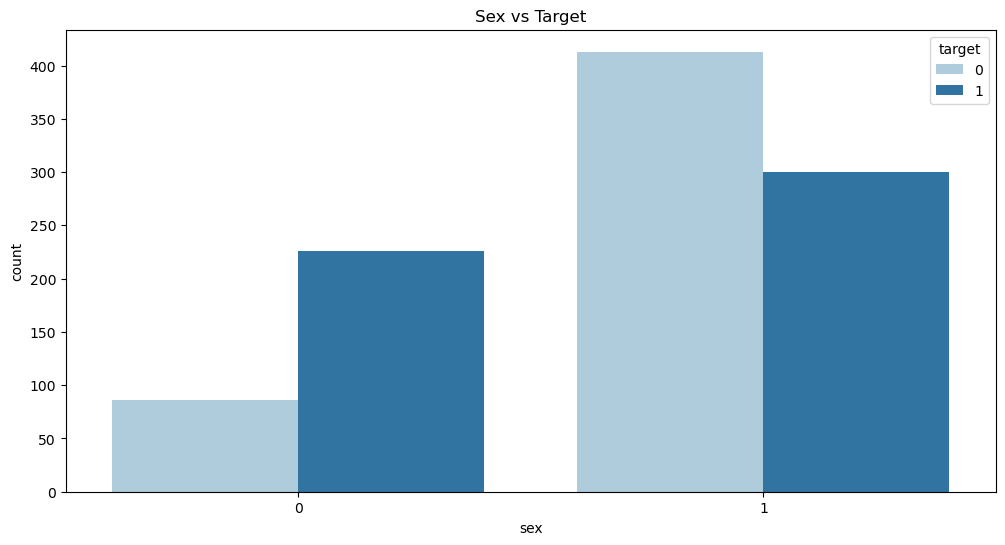

In [142]:
plt.figure(figsize=(12,6))
plt.title("Sex vs Target")
sns.countplot(x='sex',data=df, hue='target',palette="Paired")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:title={'center':'Sex vs Target'}, xlabel='age', ylabel='count'>

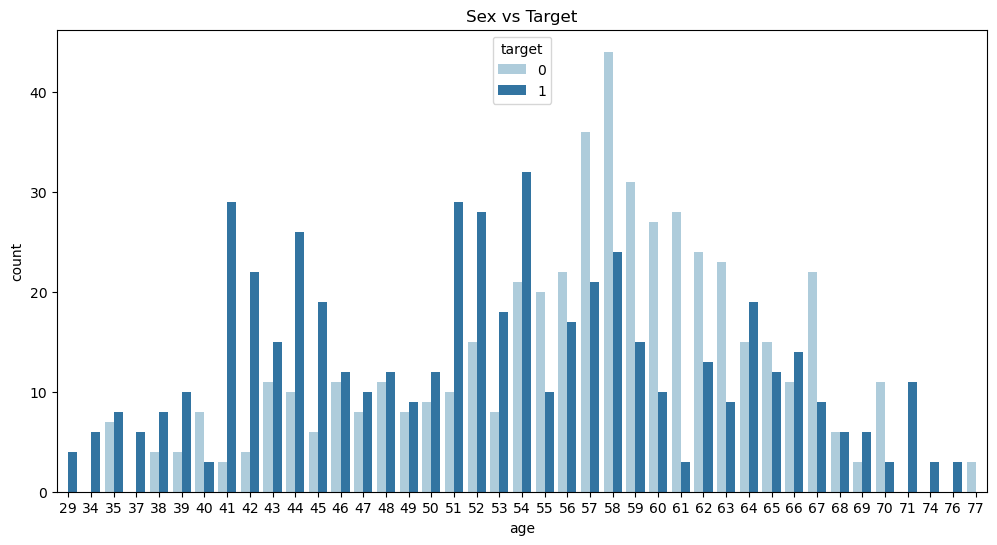

In [143]:
plt.figure(figsize=(12,6))
plt.title("Sex vs Target")
sns.countplot(x='age',data=df, hue='target',palette="Paired")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='oldpeak'>

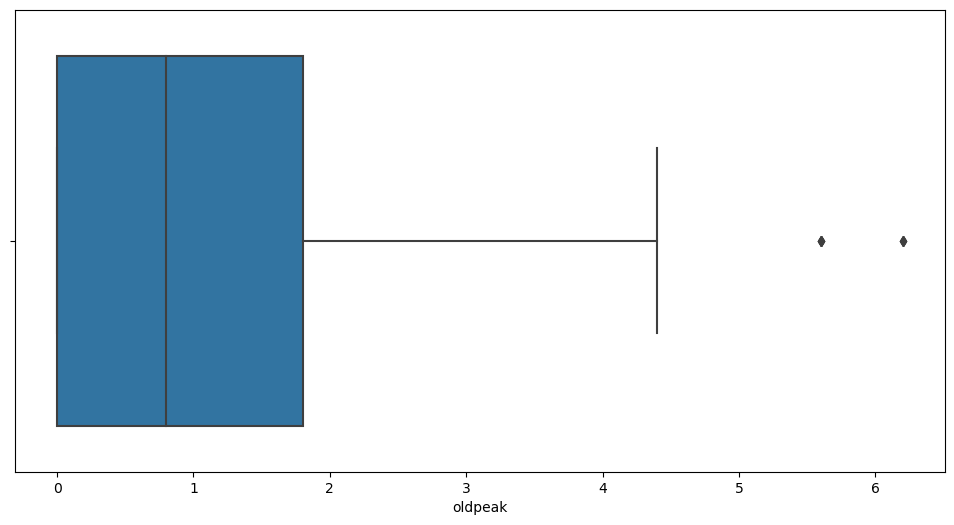

In [144]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['oldpeak'])

In [145]:
#removing outliers
outliers = df[df['oldpeak'] > df['oldpeak'].quantile(.99)].index

In [146]:
df.loc[outliers,'oldpeak'] = df['oldpeak'].quantile(.99)

In [147]:
scaler = MinMaxScaler()
df['oldpeak'] = scaler.fit_transform(df['oldpeak'].values.reshape(-1,1))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='oldpeak'>

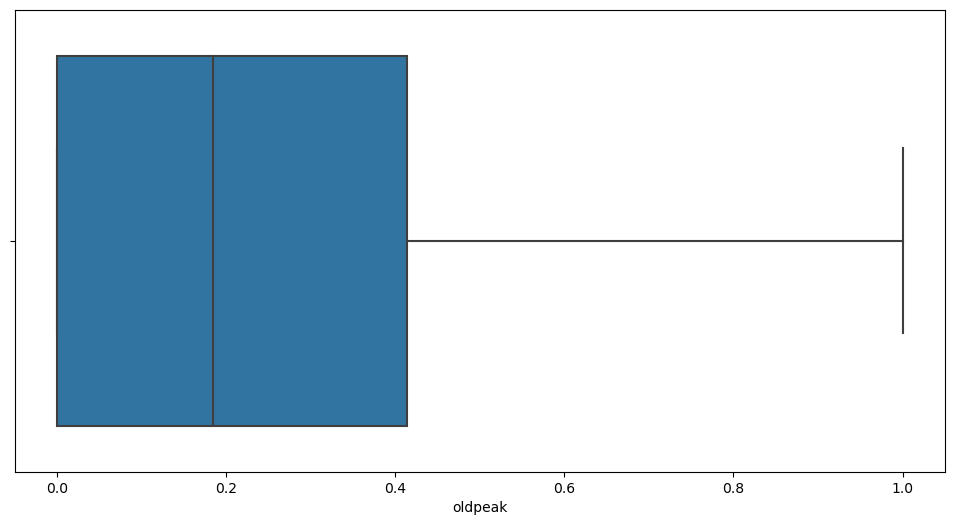

In [94]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['oldpeak'])

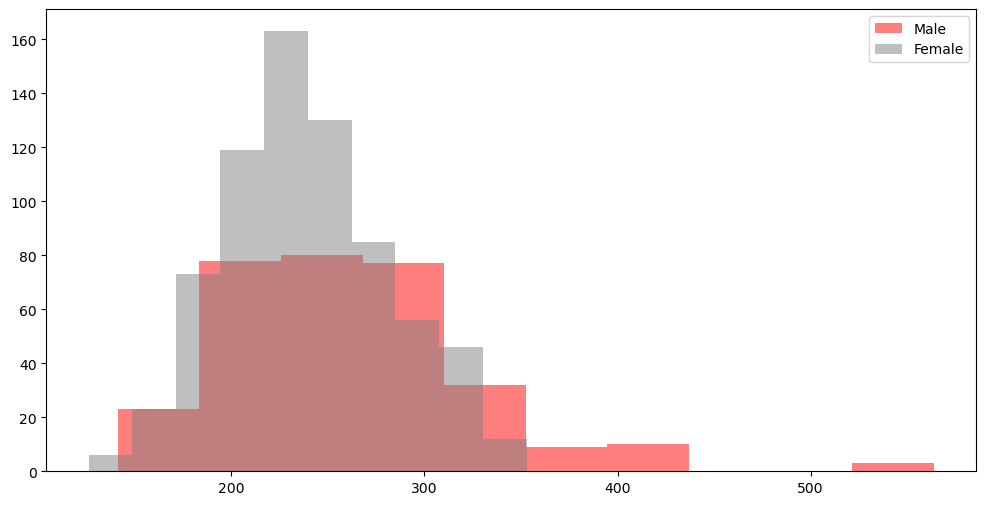

In [148]:
plt.figure(figsize=(12,6))
plt.hist(df[df['sex']==0]['chol'],color='red',alpha=0.5,label='Male')
plt.hist(df[df['sex']==1]['chol'],color='grey',alpha=0.5,label='Female')

plt.legend()

In [ ]:
Model training

In [149]:
# Define the autoencoder model
input_dim = X_train_scaled.shape[1]

autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Use the encoder part of the autoencoder to create a feature representation
encoder = keras.Sequential(autoencoder.layers[:5])  # Use the first 5 layers (encoding layers)

encoded_X_train = encoder.predict(X_train_scaled)
encoded_X_test = encoder.predict(X_test_scaled)

# Define a classifier on top of the encoder
classifier = keras.Sequential([
    layers.Input(shape=(8,)),  # Use the dimension of the encoded features
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classifier on the encoded features
classifier.fit(encoded_X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the classifier on the test data
encoded_X_test = encoder.predict(X_test_scaled)
y_pred = classifier.predict(encoded_X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Test accuracy:", accuracy)

Epoch 1/50
21/21 [==============================] - 2s 12ms/step - loss: 0.9868 - val_loss: 0.9706
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 0.8574 - val_loss: 0.8167
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 0.7162 - val_loss: 0.7167
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6197 - val_loss: 0.6587
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5558 - val_loss: 0.6082
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.5097 - val_loss: 0.5607
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 0.4744 - val_loss: 0.5145
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4387 - val_loss: 0.4787
Epoch 9/50
21/21 [==============================] - 0s 4ms/step - loss: 0.3981 - val_loss: 0.4556
Epoch 10/50
21/21 [==============================] - 0s 3ms/step - loss: 0.3684 - val_loss: 0.4249
Epoch 11/50
21/21 

21/21 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8582 - val_loss: 0.3920 - val_accuracy: 0.8110
Epoch 24/50
21/21 [==============================] - 0s 3ms/step - loss: 0.3417 - accuracy: 0.8415 - val_loss: 0.3956 - val_accuracy: 0.8049
Epoch 25/50
21/21 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8567 - val_loss: 0.3884 - val_accuracy: 0.8232
Epoch 26/50
21/21 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8506 - val_loss: 0.3892 - val_accuracy: 0.8232
Epoch 27/50
21/21 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8567 - val_loss: 0.3895 - val_accuracy: 0.8232
Epoch 28/50
21/21 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.8552 - val_loss: 0.3896 - val_accuracy: 0.8171
Epoch 29/50
21/21 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8552 - val_loss: 0.4011 - val_accuracy: 0.8110
Epoch 30/50
21/21 [======